In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import json
from os.path import expanduser

In [2]:
experiment_name = 'P3856'
feature_detection_method = 'pasef'

IDENTIFICATIONS_WITH_FMDW_DIR = '{}/P3856-results-cs-true-fmdw-true-2021-04-19-15-44-52/identifications-pasef'.format(expanduser("~"))
IDENTIFICATIONS_WITH_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITH_FMDW_DIR, experiment_name, feature_detection_method)

In [3]:
IDENTIFICATIONS_WITH_FMDW_FILE

'/home/daryl/P3856-results-cs-true-fmdw-true-2021-04-19-15-44-52/identifications-pasef/exp-P3856-identifications-pasef-recalibrated.pkl'

In [4]:
MAXIMUM_Q_VALUE = 0.01

#### identifications with mass defect window filtering

In [26]:
# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_WITH_FMDW_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_with_fmdw_df = d['identifications_df']
# identifications_with_fmdw_df = identifications_with_fmdw_df[(identifications_with_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

In [27]:
selected_feature_id = 3517302
selected_feature_df = identifications_with_fmdw_df[identifications_with_fmdw_df.feature_id == selected_feature_id]
len(json.loads(selected_feature_df.iloc[0].fragment_ions_l))

166

#### identifications without mass defect window filtering

In [28]:
IDENTIFICATIONS_WITHOUT_FMDW_DIR = '{}/P3856-results-cs-true-fmdw-false-2021-04-18-08-57-31/identifications-pasef'.format(expanduser("~"))
IDENTIFICATIONS_WITHOUT_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITHOUT_FMDW_DIR, experiment_name, feature_detection_method)


In [29]:
# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_WITHOUT_FMDW_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_without_fmdw_df = d['identifications_df']
# identifications_without_fmdw_df = identifications_without_fmdw_df[(identifications_without_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

In [30]:
selected_feature_id = 3517302
selected_feature_df = identifications_without_fmdw_df[identifications_without_fmdw_df.feature_id == selected_feature_id]
len(json.loads(selected_feature_df.iloc[0].fragment_ions_l))

205

#### unique identifications found with and without mass defect window filtering

In [31]:
sequences_l = []
for group_name,group_df in identifications_with_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].median()
    q_value = group_df['percolator q-value'].median()
    sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_with_fmdw_df = pd.DataFrame(sequences_l)

In [32]:
sequences_l = []
for group_name,group_df in identifications_without_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].median()
    q_value = group_df['percolator q-value'].median()
    sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_without_fmdw_df = pd.DataFrame(sequences_l)

In [33]:
print('{} unique ids with fmdw, {} without'.format(len(sequences_with_fmdw_df), len(sequences_without_fmdw_df)))

39951 unique ids with fmdw, 39919 without


In [34]:
combined_df = pd.merge(sequences_with_fmdw_df, sequences_without_fmdw_df, how='inner', left_on=['sequence','charge'], right_on=['sequence','charge'], suffixes=['_with_fmdw','_without_fmdw'])


In [35]:
combined_df.sample(n=5)

,sequence,charge,score_with_fmdw,q_value_with_fmdw,score_without_fmdw,q_value_without_fmdw
2485,CIETGTRQFGMCLGDPVK,2,-0.663618,0.754959,-0.603367,0.736636
23312,QRSVVPSVVPVPFDIMK,2,-0.509376,0.634613,-0.517711,0.675055
6603,ELIDFGSYVVGETTSR,2,-0.565868,0.689622,-0.503228,0.661215
6830,EMNPALGIDCLHK,2,0.585199,0.000209,0.617317,0.000207
30514,VDATEESDLAQQYGVR,2,0.819508,0.000209,0.908017,0.000207


#### compare identification score with and without

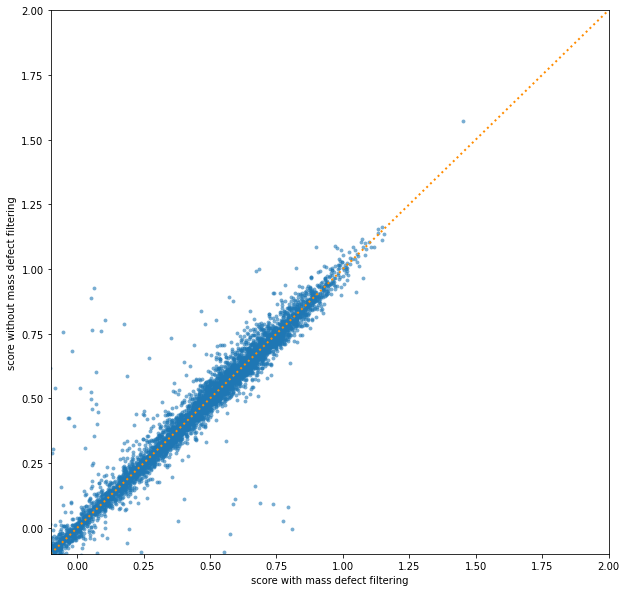

In [36]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('')

ax.scatter(combined_df.score_with_fmdw, combined_df.score_without_fmdw, marker='o', lw=0, s=15, alpha=0.6)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

plt.xlim((-0.1,2.0))
plt.ylim((-0.1,2.0))

plt.xlabel('score with mass defect filtering')
plt.ylabel('score without mass defect filtering')

plt.show()

#### compare identification q-value with and without

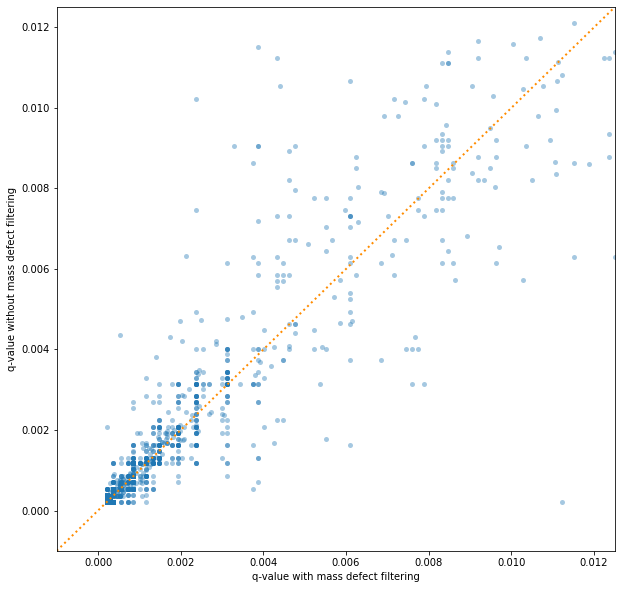

In [37]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('')

ax.scatter(combined_df.q_value_with_fmdw, combined_df.q_value_without_fmdw, marker='o', lw=0, s=25, alpha=0.4)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

plt.xlim((-0.001,0.0125))
plt.ylim((-0.001,0.0125))

plt.xlabel('q-value with mass defect filtering')
plt.ylabel('q-value without mass defect filtering')

plt.show()